# Sampling-free learning by configuration enumeration
When the total number of configurations is finite and small in *either* the visible or the hidden layer, the partition function and moments can be evaluated numerically by enumerating all possible configurations.

For instance, for a RBM with $N=5$ Bernoulli visible units and $M=10$ dReLU hidden units, there are only $2^5 = 32$ possible states in the visible layer, and the partition function $Z$  can be readily evaluated as:

$$Z = \sum_v e^{- F_v(v)} $$

Where: $$F_v = \sum_i \mathcal{U}_i (v_i) - \sum_\mu \Gamma_\mu ( I_\mu(v) ) $$

Conversly, for a RBM with $N=200$ Potts visible units and $M=5$ Bernoulli hidden units, there are only $2^5 = 32$ possible states in the visible layer, and we use:

$$ Z = \sum_h e^{-F_h(h)} $$

Where: 

$$F_h = \sum_\mu \mathcal{U}_\mu (h_\mu) - \sum_i \Gamma_i ( I_i(h) ) $$


In [25]:
import sys
import numpy as np
import utilities
import rbm
import evaluate_learning_utils
import utilities
%matplotlib inline

# Case 1: Arbitrary visible units, few discrete hidden units

In [36]:
B = 1000
N = 100
M = 3

sequences = np.random.randint(0,high=21,size=[B,N]).astype(np.int16)

RBM = rbm.RBM(n_v=N,n_h=M, visible='Potts',n_cv=21,hidden='Bernoulli')
RBM.fit(sequences,N_MC=0,from_hidden=True,n_iter=1000,verbose=0,vverbose=1);

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

Starting epoch 445
Starting epoch 446
Starting epoch 447
Starting epoch 448
Starting epoch 449
Starting epoch 450
Starting epoch 451
Starting epoch 452
Starting epoch 453
Starting epoch 454
Starting epoch 455
Starting epoch 456
Starting epoch 457
Starting epoch 458
Starting epoch 459
Starting epoch 460
Starting epoch 461
Starting epoch 462
Starting epoch 463
Starting epoch 464
Starting epoch 465
Starting epoch 466
Starting epoch 467
Starting epoch 468
Starting epoch 469
Starting epoch 470
Starting epoch 471
Starting epoch 472
Starting epoch 473
Starting epoch 474
Starting epoch 475
Starting epoch 476
Starting epoch 477
Starting epoch 478
Starting epoch 479
Starting epoch 480
Starting epoch 481
Starting epoch 482
Starting epoch 483
Starting epoch 484
Starting epoch 485
Starting epoch 486
Starting epoch 487
Starting epoch 488
Starting epoch 489
Starting epoch 490
Starting epoch 491
Starting epoch 492
Starting epoch 493
Starting epoch 494
Starting epoch 495
Starting epoch 496
Starting epo

Starting epoch 882
Starting epoch 883
Starting epoch 884
Starting epoch 885
Starting epoch 886
Starting epoch 887
Starting epoch 888
Starting epoch 889
Starting epoch 890
Starting epoch 891
Starting epoch 892
Starting epoch 893
Starting epoch 894
Starting epoch 895
Starting epoch 896
Starting epoch 897
Starting epoch 898
Starting epoch 899
Starting epoch 900
Starting epoch 901
Starting epoch 902
Starting epoch 903
Starting epoch 904
Starting epoch 905
Starting epoch 906
Starting epoch 907
Starting epoch 908
Starting epoch 909
Starting epoch 910
Starting epoch 911
Starting epoch 912
Starting epoch 913
Starting epoch 914
Starting epoch 915
Starting epoch 916
Starting epoch 917
Starting epoch 918
Starting epoch 919
Starting epoch 920
Starting epoch 921
Starting epoch 922
Starting epoch 923
Starting epoch 924
Starting epoch 925
Starting epoch 926
Starting epoch 927
Starting epoch 928
Starting epoch 929
Starting epoch 930
Starting epoch 931
Starting epoch 932
Starting epoch 933
Starting epo

[[0 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 1]
 [0 1 0]
 [0 1 1]
 [1 1 0]
 [1 1 1]]
[0.16067863 0.14066485 0.1376918  0.11263485 0.12701808 0.11688248
 0.1178819  0.08654746]


/Users/jerometubiana/Documents/Github/PGM/utilities/evaluate_learning_utils.py:238: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 720x720 with 4 Axes>,
 [6.9146477e-06, 0.00015546403, 2.1545256e-05],
 [0.9999999549352873, 0.9996199384299282, 0.9999807222502486])

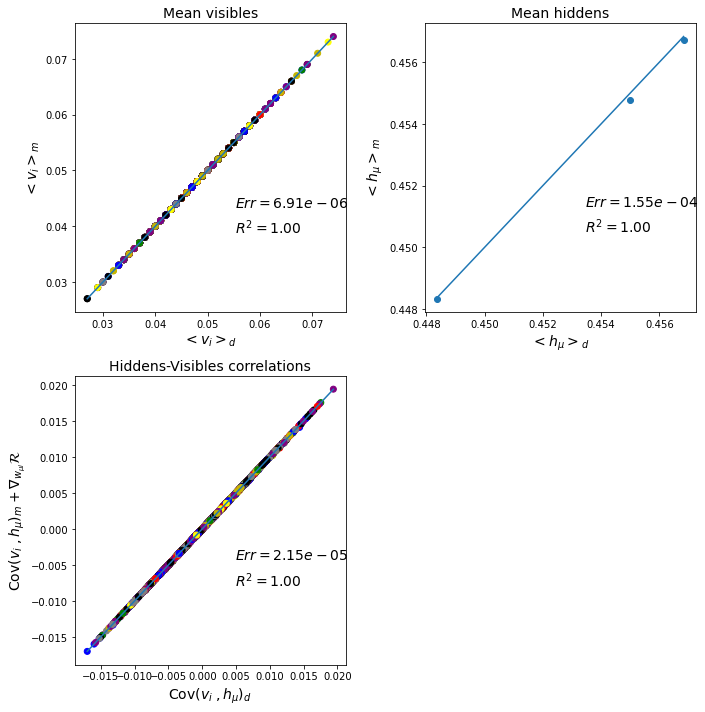

In [37]:
# Evaluate convergence.



datahgen = utilities.make_all_discrete_configs(M,'Bernoulli')

print(datahgen[:20]) # All possible configurations from [0,1]^M



F = RBM.free_energy_h(datahgen)
F -= F.min() # For numerical stability before exponential.
weights_neg = np.exp(-F)
weights_neg /= weights_neg.sum() # Boltzmann distribution

print(weights_neg[:20])

evaluate_learning_utils.assess_moment_matching(
    RBM,
sequences,
None,
    datah_gen=datahgen,
weights_neg=weights_neg # pass Boltzmann weights.

)

# Case 2: Few discrete visible units, arbitrary hidden units

In [ ]:
B = 1000
N = 5
M = 100

data = np.random.randint(0,high=2,size=[B,N]).astype(np.int16)

RBM = rbm.RBM(n_v=N,n_h=M, visible='Bernoulli',hidden='dReLU')
RBM.fit(data,N_MC=0,n_iter=1000,from_hidden=False,verbose=0,vverbose=1);

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52


In [ ]:
# Evaluate convergence.



datavgen = utilities.make_all_discrete_configs(N,'Bernoulli')

print(datavgen[:20]) # All possible configurations from [0,1]^M



F = RBM.free_energy(datavgen)
F -= F.min() # For numerical stability before exponential.
weights_neg = np.exp(-F)
weights_neg /= weights_neg.sum() # Boltzmann distribution

print(weights_neg[:20])

evaluate_learning_utils.assess_moment_matching(
    RBM,
sequences,
datavgen,
weights_neg=weights_neg # pass Boltzmann weights.

)